# Customer Segmentation (EDA, K-means, Personality analysis)

Goal : Explore Customers data, cluster customers to create managable personas, analyse created clusters.

Attributes<br>

People<br>

ID: Customer's unique identifier<br>
Year_Birth: Customer's birth year<br>
Education: Customer's education level<br>
Marital_Status: Customer's marital status<br>
Income: Customer's yearly household income<br>
Kidhome: Number of children in customer's household<br>
Teenhome: Number of teenagers in customer's household<br>
Dt_Customer: Date of customer's enrollment with the company<br>
Recency: Number of days since customer's last purchase<br>
Complain: 1 if customer complained in the last 2 years, 0 otherwise<br>

Products<br>

MntWines: Amount spent on wine in last 2 years<br>
MntFruits: Amount spent on fruits in last 2 years<br>
MntMeatProducts: Amount spent on meat in last 2 years<br>
MntFishProducts: Amount spent on fish in last 2 years<br>
MntSweetProducts: Amount spent on sweets in last 2 years<br>
MntGoldProds: Amount spent on gold in last 2 years<br>

Promotion<br>

NumDealsPurchases: Number of purchases made with a discount<br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>

Place<br>

NumWebPurchases: Number of purchases made through the company’s web site<br>
NumCatalogPurchases: Number of purchases made using a catalogue<br>
NumStorePurchases: Number of purchases made directly in stores<br>
NumWebVisitsMonth: Number of visits to company’s web site in the last month<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# EDA

In [2]:
data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data = data.set_index('ID')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

There are some null values in Income column, they consist of less than 5 % of data, it is safe to fill them with mean value.

In [6]:
data['Income'] = data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'))

In [7]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52253.592375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25039.085601,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51609.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1978
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [9]:
# Dropping Z_CostContact and Z_Revenue for lack of information value
data=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
 

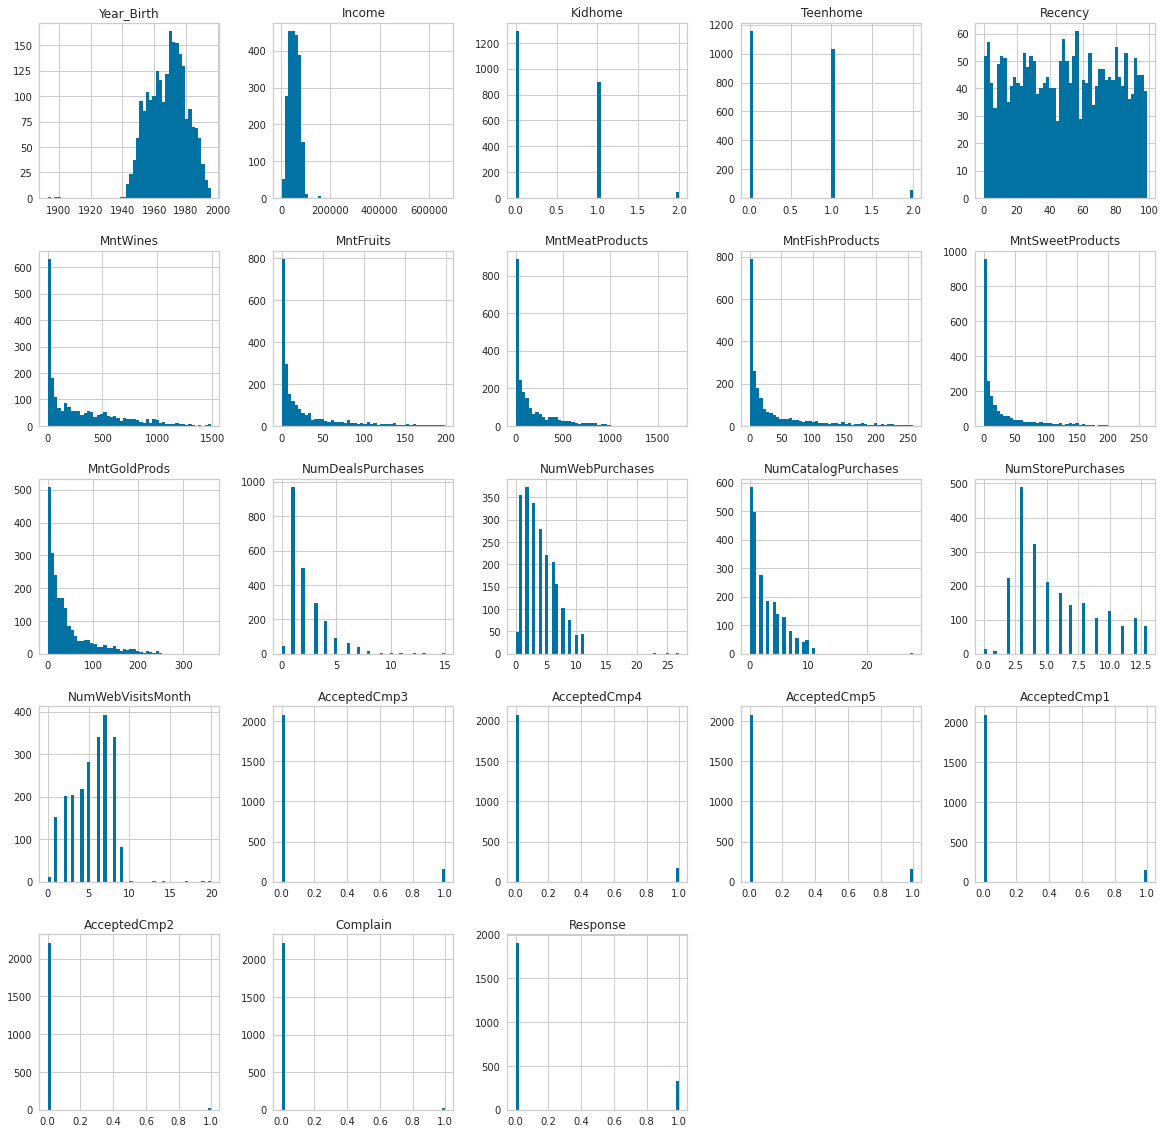

In [10]:
data.hist(bins=50, figsize=(20,20))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0.5, 0, 'Year_Birth'),
  Text(1.5, 0, 'Income'),
  Text(2.5, 0, 'Kidhome'),
  Text(3.5, 0, 'Teenhome'),
  Text(4.5, 0, 'Recency'),
  Text(5.5, 0, 'MntWines'),
  Text(6.5, 0, 'MntFruits'),
  Text(7.5, 0, 'MntMeatProducts'),
  Text(8.5, 0, 'MntFishProducts'),
  Text(9.5, 0, 'MntSweetProducts'),
  Text(10.5, 0, 'MntGoldProds'),
  Text(11.5, 0, 'NumDealsPurchases'),
  Text(12.5, 0, 'NumWebPurchases'),
  Text(13.5, 0, 'NumCatalogPurchases'),
  Text(14.5, 0, 'NumStorePurchases'),
  Text(15.5, 0, 'NumWebVisitsMonth'),
  Text(16.5, 0, 'AcceptedCmp3'),
  Text(17.5, 0, 'AcceptedCmp4'),
  Text(18.5, 0, 'AcceptedCmp5'),
  Text(19.5, 0, 'AcceptedCmp1'),
  Text(20.5, 0, 'AcceptedCmp2'),
  Text(21.5, 0, 'Complain'),
  Text(22.5, 0, 'Response')])

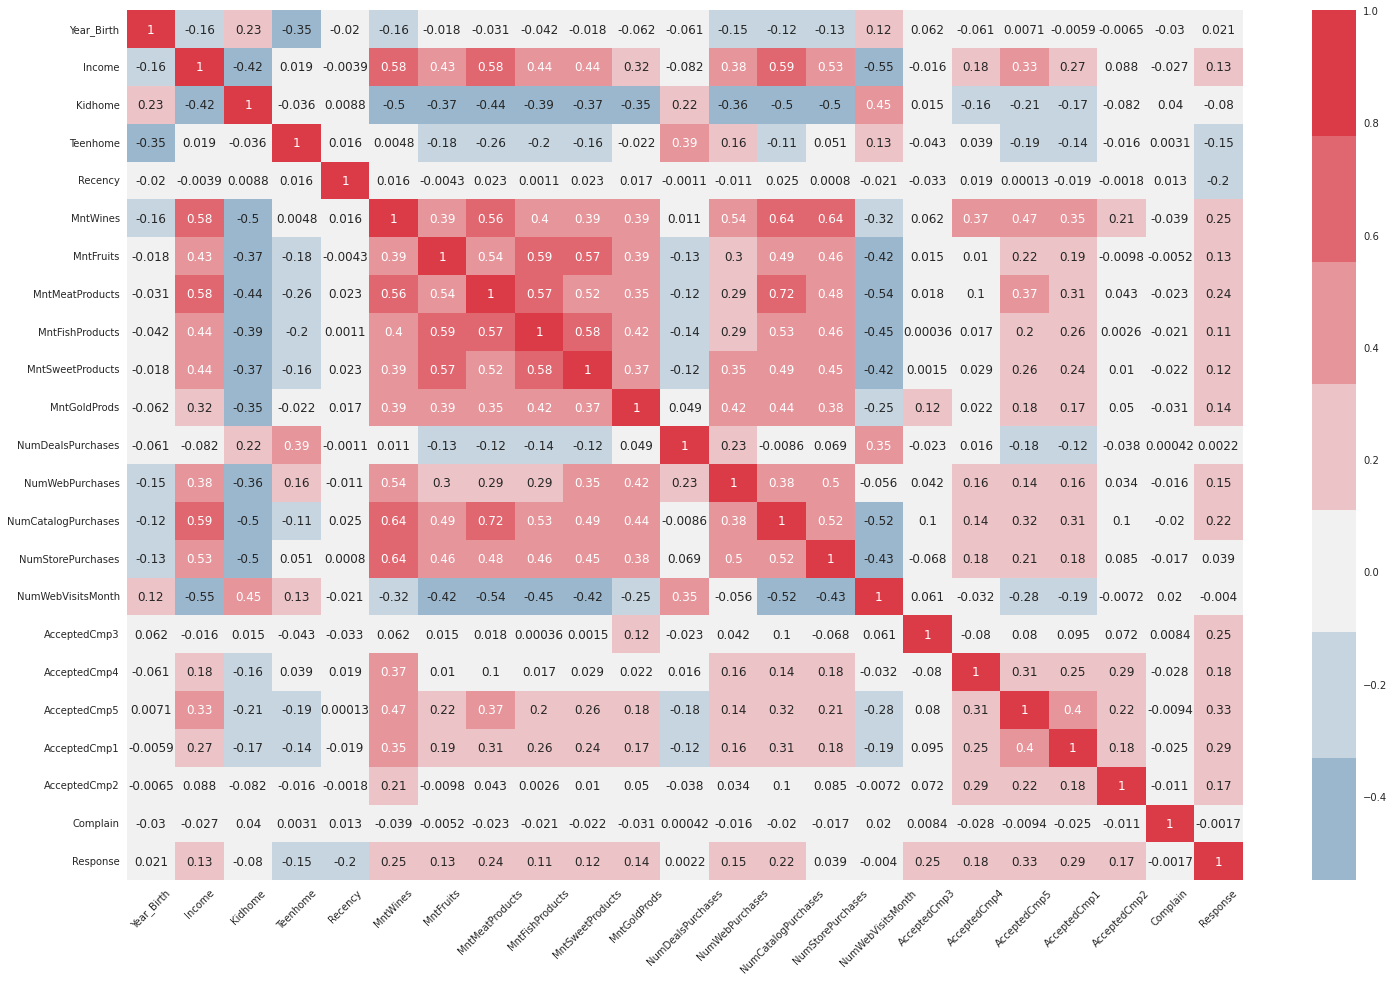

In [11]:
# Visualisation of corellations between columns
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(25, 16))
ax = sns.heatmap(data.corr(), cmap=sns.diverging_palette(240, 10, n=9), annot = True, ax = ax, center = 0)
plt.xticks(rotation=45)

# Feature Engineering

In [12]:
data['Education'] = data['Education'].replace('2n Cycle', 'Master')

In [13]:
# Creating total time of customers in company, last timestamp is from 2014 so i'll count days from 01.01.2015 to avoid
# creating unrealistic numbers that are results of using old data.
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['days_in_company']= (np.datetime64("2015-01-01") - data['Dt_Customer']).dt.days

In [14]:
# Transforming Year Birth into Age
data['Age']= 2015 - data['Year_Birth']

In [15]:
# Calculating Total Spending
data['total_spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [16]:
# Calculating total number of purchases
data['total_purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases']+ data['NumStorePurchases']

In [17]:
# Calculating total number of Accepted promotion campaign
data['total_accepted_cmp'] = data['AcceptedCmp3']+ data['AcceptedCmp4']+ data['AcceptedCmp5'] + data['AcceptedCmp1'] +data['AcceptedCmp2']

In [18]:
# Calculating total number of kids in houshold
data['kids'] = data['Kidhome']+data['Teenhome']

In [19]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [20]:
# Simplifying relationship status
data['Marital_Status'] = data['Marital_Status'].replace(['Single', 'Widow', 'Alone', 'Absurd', 'YOLO','Divorced'], 'Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'Relationship')

Looking for outliers

<AxesSubplot:xlabel='Age'>

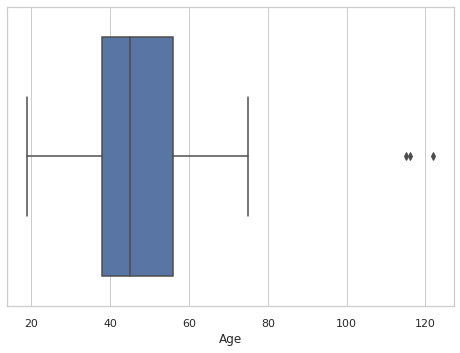

In [21]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=data['Age'])

<AxesSubplot:xlabel='Income'>

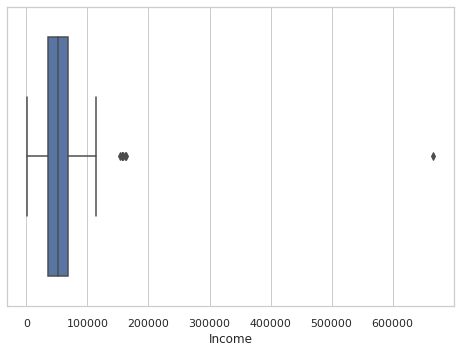

In [22]:
sns.boxplot(x=data['Income'])

<AxesSubplot:xlabel='total_spending'>

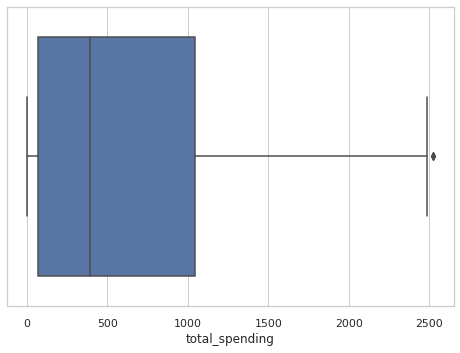

In [23]:
sns.boxplot(x=data['total_spending'])

Removing outliers from Age and Income

In [24]:
data = data[data['Age'] < 80]
data = data[data['Income'] < 120000]

In [25]:
print("Removed {} rows with outliers".format(2240 - data.shape[0]))

Removed 11 rows with outliers


# Clustering

Preparing data for clustering

In [26]:
cluster_columns = ['Age','Education','Income','Marital_Status','kids', 'total_spending', 'total_accepted_cmp']
cluster_data = data[cluster_columns].copy()

Encoding categorial columns

In [27]:
ordinal_cols_mapping =[
    { 
 'col':'Education',
            'mapping':{ 
                'Basic' : 1,
                'Graduation' : 2,
                'Master' : 3,
                'PhD' : 4},
    }
]
encoder = OrdinalEncoder(mapping = ordinal_cols_mapping)
cluster_data = encoder.fit_transform(cluster_data)

In [28]:
cluster_data['Marital_Status'] = cluster_data['Marital_Status'].replace('Relationship', 1)
cluster_data['Marital_Status'] = cluster_data['Marital_Status'].replace('Single', 0)

In [29]:
cluster_data['Marital_Status'].value_counts()

1    1436
0     793
Name: Marital_Status, dtype: int64

In [30]:
cluster_data.describe()

,Age,Education,Income,Marital_Status,kids,total_spending,total_accepted_cmp
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,46.111261,2.663078,51635.198260,0.644235,0.951996,605.541050,0.298789
std,11.707430,0.838902,20603.067315,0.478852,0.751976,601.032228,0.679597
min,19.000000,1.000000,1730.000000,0.000000,0.000000,5.000000,0.000000
25%,38.000000,2.000000,35416.000000,0.000000,0.000000,69.000000,0.000000
50%,45.000000,2.000000,51518.000000,1.000000,1.000000,397.000000,0.000000
75%,56.000000,3.000000,68118.000000,1.000000,1.000000,1044.000000,0.000000
max,75.000000,4.000000,113734.000000,1.000000,3.000000,2525.000000,4.000000


Normalization

In [31]:
scaler = StandardScaler()
scaler.fit(cluster_data)
norm_cluster_data = pd.DataFrame(scaler.transform(cluster_data), columns= cluster_columns, index=cluster_data.index)

In [32]:
norm_cluster_data.head()

,Age,Education,Income,Marital_Status,kids,total_spending,total_accepted_cmp
ID,,,,,,,
5524,1.015715,-0.790588,0.315694,-1.345676,-1.266277,1.683247,-0.439754
2174,1.272020,-0.790588,-0.256874,-1.345676,1.393978,-0.962795,-0.439754
4141,0.332234,-0.790588,0.969869,0.743121,-1.266277,0.283674,-0.439754
6182,-1.291031,-0.790588,-1.213159,0.743121,0.063851,-0.919526,-0.439754
5324,-1.034726,1.594014,0.323219,0.743121,0.063851,-0.305445,-0.439754


Clustering using KMeans

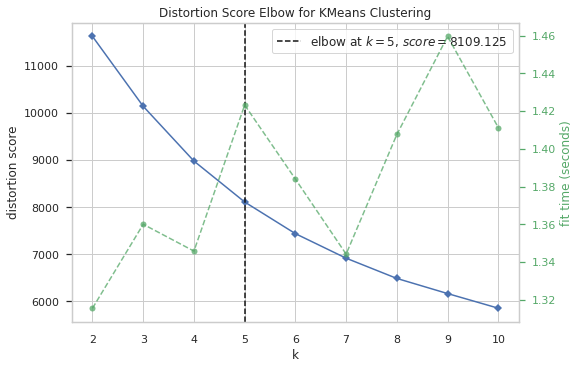

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(norm_cluster_data) 
visualizer.show()  

In [34]:
model = KMeans(n_clusters = 5, random_state = 42)
cluster_class = model.fit_predict(norm_cluster_data)

In [35]:
cluster_data['cluster_class'] = cluster_class + 1

In [36]:
data['cluster_class'] = cluster_class + 1

# Analysing clustered group

In [37]:
groupby_clusters = cluster_data.groupby(cluster_class)

In [38]:
groupby_clusters.mean()

,Age,Education,Income,Marital_Status,kids,total_spending,total_accepted_cmp,cluster_class
0,51.744240,3.762673,49960.305618,0.721198,1.394009,401.495392,0.156682,1.0
1,48.159247,2.575342,72660.221333,0.640411,0.369863,1269.938356,0.275685,2.0
2,43.487923,2.309179,38488.665295,0.000000,1.157005,229.128019,0.106280,3.0
3,42.625378,2.225076,36665.506373,1.000000,1.179758,192.563444,0.089124,4.0
4,44.281481,2.740741,79789.943509,0.644444,0.303704,1566.829630,2.474074,5.0


In [39]:
cluster_data['cluster_class'].value_counts()

4    662
2    584
1    434
3    414
5    135
Name: cluster_class, dtype: int64

KDE graphs was adjusted for cluster size.

<AxesSubplot:xlabel='Age', ylabel='Density'>

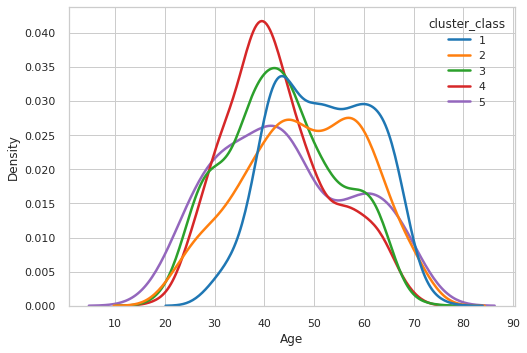

In [40]:
sns.kdeplot(x = cluster_data["Age"], hue = cluster_data['cluster_class'], palette="tab10",linewidth = 2.5, common_norm=False)

In [41]:
groupby_clusters.mean()['Age']

0    51.744240
1    48.159247
2    43.487923
3    42.625378
4    44.281481
Name: Age, dtype: float64

Class 1 - Older people mostly 40-65<br>
Class 2 - Older people mostly 40-60 with presence of younger<br>
Class 3 - Mostly Middle Aged with presence of older<br>
Class 4 - Mostly Middle Aged<br>
Class 5 - Mostly young people with presence of older<br>

Text(0.5, 1.0, 'Percentage of people in Relationship')

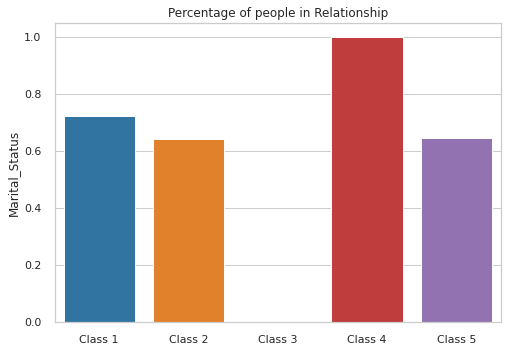

In [42]:
sns.barplot(x = ['Class 1','Class 2', 'Class 3', 'Class 4','Class 5'], y=groupby_clusters.mean()['Marital_Status'], palette="tab10").set_title('Percentage of people in Relationship')

In [43]:
groupby_clusters.mean()['Marital_Status']

0    0.721198
1    0.640411
2    0.000000
3    1.000000
4    0.644444
Name: Marital_Status, dtype: float64

Class 1 - 72 % is in relationship<br>
Class 2 - 64 % is in relationship<br>
Class 3 - 0 % is in relationship<br>
Class 4 - 100 % is in relationship<br>
Class 5 - 64 % is in relationship <br>

<AxesSubplot:xlabel='kids', ylabel='Density'>

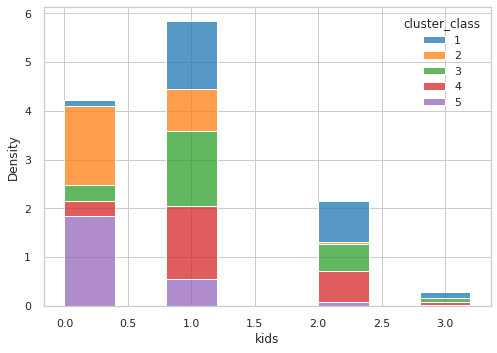

In [44]:
sns.histplot(x = cluster_data["kids"], hue = cluster_data['cluster_class'], palette="tab10", multiple = 'stack', binwidth=0.4, stat='density', common_norm=False)

Class 1 - Have often 1 or 2 kids rarely 0 or 3<br>
Class 2 - Have mostly 0 kid, rarely 1<br>
Class 3 - Have mostly 1 kid rarely 0 or 1<br>
Class 4 - Have mostly 1 kid rarely 0 or 1<br>
Class 5 - Have mostly 0 kid rarely 1<br>

<AxesSubplot:xlabel='Education', ylabel='Density'>

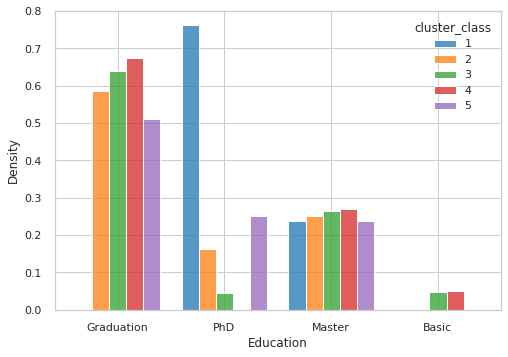

In [45]:
sns.histplot(x = data["Education"], hue = data['cluster_class'], palette="tab10", multiple = 'dodge', binwidth=0.5, shrink = 0.8, stat='density', common_norm=False)

Class 1 - Highest Education Mostly PhD some Master<br>
Class 2 - High Education Mostly Graduated significant part have Master some have PhD<br>
Class 3 - Standard Education Mostly Graduated significant part have Master some PhD and some have Basic<br>
Class 4 - Similar to Class 3 with no PhD presence<br>
Class 5 - High Education Half group have either PhD or Master, rest Graduated<br>

<AxesSubplot:xlabel='Income', ylabel='Density'>

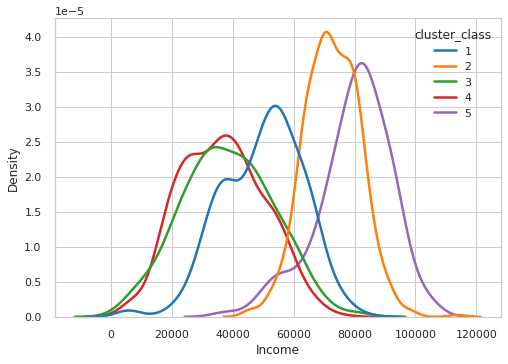

In [46]:
sns.kdeplot(x = cluster_data["Income"], hue = cluster_data['cluster_class'], palette="tab10", linewidth = 2.5, common_norm=False)

Cluster 1 - Medium Income<br>
Cluster 2 - High Income<br>
Cluster 3 - Low to Medium income<br>
Cluster 4 - Low to Medium Income<br>
Cluster 5 - Very High Income<br>

<AxesSubplot:xlabel='total_spending', ylabel='Density'>

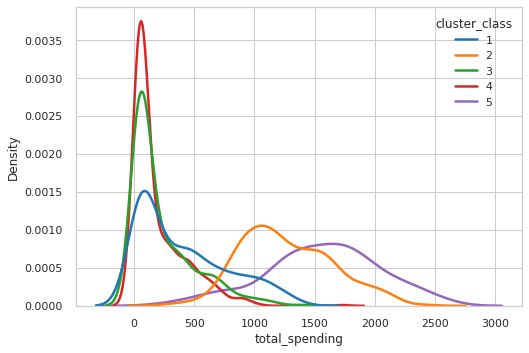

In [47]:
sns.kdeplot(x = cluster_data["total_spending"], hue = cluster_data['cluster_class'], palette="tab10",linewidth = 2.5, common_norm=False)

Cluster 1 - Low to Medium Spending<br>
Cluster 2 - High Spending<br>
Cluster 3 - Low to Lower-Medium spending<br>
Cluster 4 - Low spending<br>
Cluster 5 - Biggest spending<br>

<AxesSubplot:xlabel='total_accepted_cmp', ylabel='Density'>

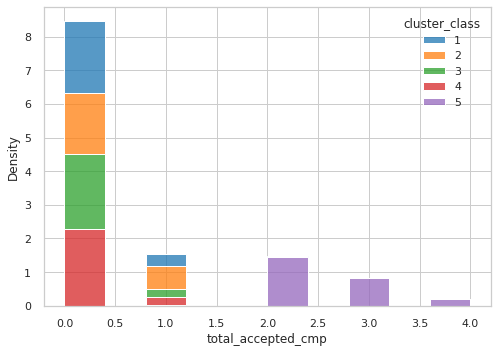

In [48]:
sns.histplot(x = cluster_data["total_accepted_cmp"], hue = cluster_data['cluster_class'], palette="tab10", multiple = 'stack', binwidth=0.4, stat='density', common_norm=False)

Class 1, 3, 4 - rarely use coupons<br>
Class 2 - sometimes use coupons<br>
Class 5 - use coupons very often<br>

# Summary of cluster classes.

Summary: <br>

Cluster 1 "Medium-class parents / intelligency "- Older, 72 % in relationship, have 1 or 2 kids, Very High education ,Medium Income, Low to Medium Spending, rarely use promotions<br>

Cluster 2 "Rich retired"- Older,65 % in relationship, No kids in home, High Education,High Income, High Spending, sometimes use promotion,<br>
<br>
Cluster 3 "Single parent"- Young to middle Aged, 0 % in relationship, have often 1 kid, Standard education ,Low Income, Low to lower-medium spending, rarely use promotions<br>
<br>
Cluster 4 "Love and married"- Young to Middle Aged, always in relationship, have 1 or 2 kids, Standard education, Low Income, Low spender, rarely use promotions<br>
<br>
Cluster 5 "Rich, childfree"- Spread in age, mostly young, 65 % in relationship, have mostly 0 kids sometimes 1, High Education ,Very High income, Biggest Spender, very often use coupons,<br>